# Film Recommendation System

## Overview
Sistem rekomendasi film ini dirancang untuk menemukan film yang sesuai dengan preferensi berdasarkan konten seperti genre, kata kunci, dan pemeran. Sistem ini menggunakan pendekatan *content-based filtering* dengan data dari The Movie Database ([TMDB](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata))

## Proyek ini mencakup beberapa langkah utama
- **Data Understanding**: Memahami struktur dan kualitas data.
- **Data Preprocessing**: Membersihkan dan mempersiapkan data untuk analisis lebih lanjut.
- **Feature Engineering**: Membuat representasi numerik dari data untuk digunakan dalam model.
- **Modeling**: Membangun sistem rekomendasi berbasis konten.
- **Evaluation**: Mengevaluasi hasil rekomendasi.
- **Kesimpulan**: Menyimpulkan hasil.

## References
- **Dataset**: The Movie Database (TMDB) Movie Metadata. Diakses dari [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata).
- **Content-Based Filtering**: Lops, P., de Gemmis, M., & Semeraro, G. (2011). *Content-based Recommender Systems: State of the Art and Trends*. Recommender Systems Handbook, 73-105. https://doi.org/10.1007/978-0-387-85820-3_3

---

## **1. Import Library**

Kode berikut digunakan untuk memuat pustaka yang diperlukan untuk analisis data, pengolahan teks, visualisasi, dan pembelajaran mesin:
- **`pandas`**: Untuk manipulasi dan analisis data dalam bentuk DataFrame.
- **`numpy`**: Untuk operasi numerik pada array.
- **`json`**: Untuk membaca dan memproses data dalam format JSON.
- **`scikit-learn`**: Untuk:
  - Mengonversi teks menjadi fitur numerik menggunakan `TfidfVectorizer`.
  - Mengukur tingkat kemiripan antar data menggunakan `cosine_similarity`.
  - Melakukan binarisasi data kategori menggunakan `MultiLabelBinarizer`.
- **`scipy`**: Untuk operasi pada matriks sparse, seperti penggabungan matriks menggunakan `hstack`.
- **`matplotlib` dan `seaborn`**: Untuk visualisasi data.
- **`MinMaxScaler`**: Untuk normalisasi fitur numerik ke dalam rentang tertentu.

In [ ]:
import pandas as pd
import numpy as np
import os
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## **2. Data Understanding**

Pada bagian ini, kita akan memuat dataset, memahami struktur data, dan menganalisis kualitas data. Langkah-langkah yang dilakukan meliputi:
- Mengunduh dataset dari [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata).
- Membaca file CSV ke dalam DataFrame.
- Menampilkan beberapa baris pertama untuk memahami struktur data.
- Menganalisis kualitas data, termasuk nilai yang hilang dan duplikasi.

### **2.1 Pengumpulan Data**

Kode berikut digunakan untuk mengunduh dataset dari Kaggle, memuat file CSV ke dalam DataFrame, dan menampilkan beberapa baris pertama untuk memahami struktur data:
- **Langkah 1**: Mengatur kredensial Kaggle menggunakan variabel lingkungan `KAGGLE_USERNAME` dan `KAGGLE_KEY`.
- **Langkah 2**: Mengunduh dataset TMDB Movie Metadata dari Kaggle menggunakan perintah `!kaggle datasets download`.
- **Langkah 3**: Mengekstrak file ZIP yang diunduh menggunakan perintah `!unzip`.
- **Langkah 4**: Membaca file CSV `tmdb_5000_credits.csv` dan `tmdb_5000_movies.csv` ke dalam DataFrame `df1` dan `df2` menggunakan `pandas.read_csv()`.
- **Langkah 5**: Menampilkan lima baris pertama dari masing-masing DataFrame menggunakan `head()` untuk memahami struktur data.

In [ ]:
# Downaod Dataset dari Kaggle
import os

os.environ['KAGGLE_USERNAME'] = 'YOUR_KAGGLE_USERNAME'
os.environ['KAGGLE_KEY'] = 'YOUR_KAGGLE_KEY'

# Download datasets
!kaggle datasets download -d tmdb/tmdb-movie-metadata

# Unzip file
!unzip tmdb-movie-metadata.zip

Dataset URL: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
License(s): other
  0% 0.00/8.89M [00:00<?, ?B/s]
100% 8.89M/8.89M [00:00<00:00, 318MB/s]
Archive:  tmdb-movie-metadata.zip
  inflating: tmdb_5000_credits.csv   
  inflating: tmdb_5000_movies.csv    


In [ ]:
# Membaca file csv
df1=pd.read_csv('./tmdb_5000_credits.csv')
df2=pd.read_csv('./tmdb_5000_movies.csv')

In [ ]:
# Menampilkan 5 data teratas
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
# Menampilkan 5 data teratas
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### **2.2 Analisis Kualitas Data**

Pada bagian ini, kita akan menganalisis kualitas dataset dengan langkah-langkah berikut:

- **Langkah 1**: Menampilkan informasi struktur dataset menggunakan fungsi `info()` untuk memahami tipe data, jumlah entri, dan kolom yang tersedia.
- **Langkah 2**: Memeriksa nilai yang hilang (missing values) di setiap kolom menggunakan fungsi `isnull().sum()`.
- **Langkah 3**: Memeriksa jumlah baris duplikat dalam dataset menggunakan fungsi `duplicated().sum()`.

Hasil analisis ini akan membantu kita memahami apakah ada masalah kualitas data yang perlu ditangani sebelum melanjutkan ke tahap berikutnya.

In [ ]:
# tampilkan informasi dataset 1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


>Terdapat 4803 baris data dan 4 kolom data

In [ ]:
# tampilkan informasi dataset 2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

>Terdapat 4803 baris data dan 20 kolom data

In [ ]:
# Cek missing values dan duplicate values
missing = df1.isnull().sum()
duplicates = df1.duplicated().sum()

print("=== Ringkasan Data yang Hilang ===")
print(missing[missing > 0].sort_values(ascending=False))  # Menampilkan hanya kolom yang memiliki missing values

print("\n=== Jumlah Baris Duplikat ===")
print(f"{duplicates} baris duplikat ditemukan dalam dataset.")


=== Ringkasan Data yang Hilang ===
Series([], dtype: int64)

=== Jumlah Baris Duplikat ===
0 baris duplikat ditemukan dalam dataset.


> Berdasarkan hasil eksplorasi awal terhadap dataset, dapat disimpulkan bahwa tidak terdapat data yang hilang pada seluruh kolom, sebagaimana ditunjukkan oleh keluaran *Series(\[], dtype: int64)* yang menandakan bahwa setiap kolom memiliki jumlah nilai yang lengkap. Selain itu, tidak ditemukan adanya baris duplikat dalam dataset, dengan total 0 baris yang terdeteksi sebagai duplikat. Temuan ini menunjukkan bahwa dataset dalam kondisi bersih dan siap untuk tahap analisis atau pemodelan lebih lanjut tanpa perlu melakukan penanganan terhadap data yang hilang maupun duplikasi.


In [ ]:
# Cek missing values dan duplicate values
missing2 = df2.isnull().sum()
duplicates2 = df2.duplicated().sum()

print("=== Ringkasan Data yang Hilang ===")
print(missing2[missing2 > 0].sort_values(ascending=False))

print("\n=== Jumlah Baris Duplikat ===")
print(f"{duplicates2} baris duplikat ditemukan dalam dataset.")


=== Ringkasan Data yang Hilang ===
homepage        3091
tagline          844
overview           3
runtime            2
release_date       1
dtype: int64

=== Jumlah Baris Duplikat ===
0 baris duplikat ditemukan dalam dataset.


>Berdasarkan hasil eksplorasi terhadap dataset, ditemukan sejumlah data yang hilang pada beberapa kolom. Kolom *homepage* memiliki jumlah data hilang terbanyak, yakni sebanyak 3.091 entri, diikuti oleh kolom *tagline* dengan 844 entri yang hilang. Kolom *overview* juga memiliki 3 nilai yang hilang, sedangkan kolom *runtime* dan *release\_date* masing-masing memiliki 2 dan 1 nilai yang hilang. Meskipun sebagian besar kolom memiliki data lengkap, adanya data yang hilang terutama dalam jumlah besar seperti pada *homepage* dan *tagline* perlu mendapat perhatian khusus dalam tahap prapemrosesan data. Di sisi lain, hasil pemeriksaan terhadap baris duplikat menunjukkan bahwa tidak ada baris duplikat yang ditemukan dalam dataset. Hal ini menandakan bahwa data tidak memiliki pengulangan yang tidak perlu dan sudah cukup bersih dari segi keunikan entri.


#### Insight Rincian Lengkap Variabel/Fitur

➡️ Berikut ini merupakan deskripsi lengkap metadata yang terdapat dalam dataset **df1** atau **tmdb_5000_credits**:

| No  | Kolom      | Tipe Data | Non-Null Count | Deskripsi                          | Contoh Data                                                    |
|-----|------------|-----------|----------------|------------------------------------|----------------------------------------------------------------|
| 1   | movie_id   | int64     | 4803           | ID unik film di TMDB               | 19995                                                          |
| 2   | title      | object    | 4803           | Judul film                         | "Avatar"                                                       |
| 3   | cast       | object    | 4803           | Daftar pemeran film (dalam JSON)   | `[{"cast_id": 242, "character": "Jake Sully",  "gender": 2, "...}]`|
| 4   | crew       | object    | 4803           | Daftar kru film dalam format JSON  | `[{"department": "Editing", "gender": 0, "id": 1721, "job": ... }]`|

➡️ Berikut ini merupakan deskripsi lengkap metadata yang terdapat dalam dataset **df2** atau **tmdb_5000_movies**:

| No  | Kolom                | Tipe Data | Non-Null Count | Deskripsi                          | Contoh Data                                                    |
|-----|----------------------|-----------|----------------|------------------------------------|----------------------------------------------------------------|
| 1   | budget               | int64     | 4803           | Anggaran produksi film (dalam USD) | 237000000                                                      |
| 2   | genres               | object    | 4803           | Daftar genre dalam format JSON     | `[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"}]`     |
| 3   | homepage             | object    | 1712           | URL website resmi film             | "http://www.avatarmovie.com/"                                  |
| 4   | id                   | int64     | 4803           | ID unik film di TMDB               | 19995                                                          |
| 5   | keywords             | object    | 4803           | Kata kunci terkait film (JSON)     | `[{"id":1463,"name":"culture clash"},{"id":2968,"name":"future"}]`|
| 6   | original_language    | object    | 4803           | Bahasa asli film (kode ISO)        | "en"                                                           |
| 7   | original_title       | object    | 4803           | Judul asli film                    | "Avatar"                                                       |
| 8   | overview             | object    | 4800           | Sinopsis/ringkasan cerita          | "In the 22nd century, a paraplegic Marine..."                  |
| 9   | popularity           | float64   | 4803           | Skor popularitas TMDB              | 150.437577                                                     |
| 10  | production_companies | object    | 4803           | Perusahaan produksi (JSON)         | `[{"name":"Ingenious Film Partners","id":289}]`                |
| 11  | production_countries | object    | 4803           | Negara produksi (JSON)             | `[{"iso_3166_1":"US","name":"United States"}]`                 |
| 12  | release_date         | object    | 4802           | Tanggal rilis (YYYY-MM-DD)         | "2009-12-10"                                                   |
| 13  | revenue              | int64     | 4803           | Pendapatan kotor (USD)             | 2787965087                                                     |
| 14  | runtime              | float64   | 4801           | Durasi film (menit)                | 162.0                                                          |
| 15  | spoken_languages     | object    | 4803           | Bahasa yang digunakan (JSON)       | `[{"iso_639_1":"en","name":"English"}]`                        |
| 16  | status               | object    | 4803           | Status rilis                       | "Released"                                                     |
| 17  | tagline              | object    | 3959           | Slogan film                        | "Enter the World of Pandora."                                  |
| 18  | title                | object    | 4803           | Judul film                         | "Avatar"                                                       |
| 19  | vote_average         | float64   | 4803           | Rating rata-rata (0-10)            | 7.2                                                            |
| 20  | vote_count           | int64     | 4803           | Jumlah vote                        | 11800                                                          |

### **2.3 Exploratory Data Analysis (EDA)**

#### Distribusi Genre Film

Kode berikut digunakan untuk menganalisis distribusi genre film dalam dataset:
- **Langkah 1**: Kolom `genres` yang berisi data dalam format JSON diubah menjadi daftar nama genre menggunakan `json.loads` dan `lambda`. Hasilnya disimpan dalam kolom baru bernama `genres_list`.
- **Langkah 2**: Semua genre dari setiap film digabungkan menjadi satu daftar menggunakan list comprehension, menghasilkan variabel `all_genres`.
- **Langkah 3**: Frekuensi kemunculan setiap genre dihitung menggunakan `pd.Series` dan `value_counts()`. Hanya 10 genre teratas yang diambil untuk analisis lebih lanjut.
- **Langkah 4**: Data frekuensi genre divisualisasikan dalam bentuk diagram batang menggunakan `matplotlib` dan `seaborn`.

#### Output Visualisasi
- Diagram batang menunjukkan distribusi 10 genre teratas dalam dataset. Genre dengan jumlah kemunculan tertinggi adalah **Drama**, diikuti oleh **Comedy**, **Thriller**, dan genre lainnya.

In [ ]:
# Ubah kolom 'genre' menjadi daftar nama genre
df2['genres_list'] = df2['genres'].apply(lambda x: [i['name'] for i in json.loads(x)])

# Gabungkan semua genre menjadi satu daftar
all_genres = [genre for sublist in df2['genres_list'] for genre in sublist]

# Hitung frekuensi setiap genre dan dapatkan 10 teratas
genre_counts = pd.Series(all_genres).value_counts().head(10)

<ipython-input-11-ad574f92b2d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


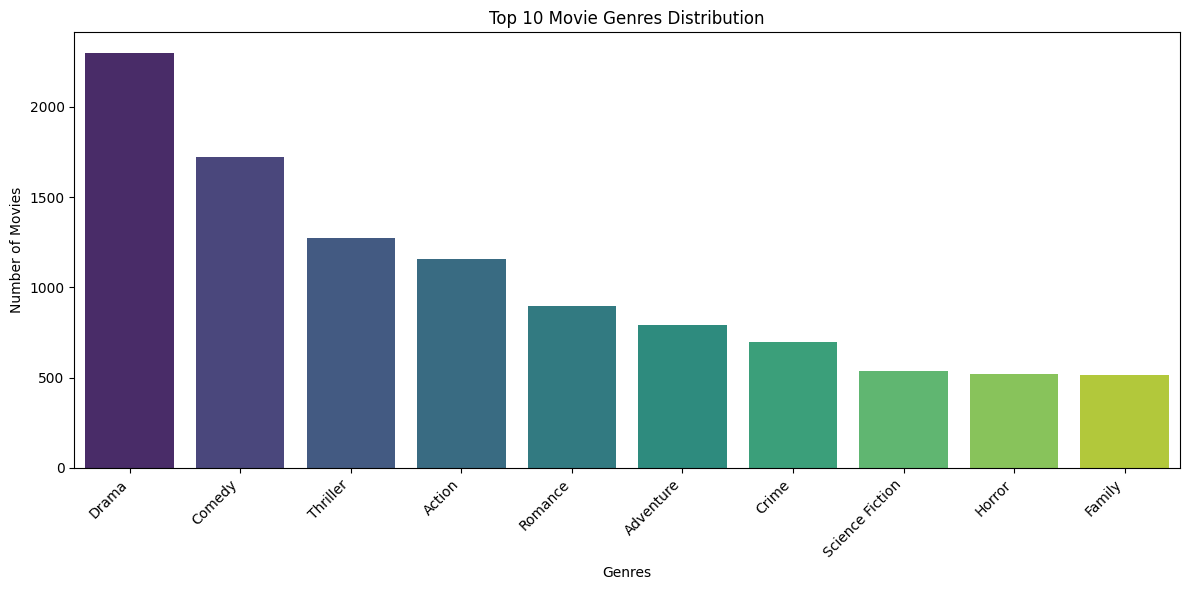

In [ ]:
# Memvisualisasikan distribusi genre menggunakan diagram batang
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Top 10 Movie Genres Distribution')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Insigth

1. **Genre Drama Mendominasi:** Genre drama memiliki jumlah film yang jauh lebih banyak dibandingkan genre lainnya, dengan lebih dari 2250 film. Ini menunjukkan popularitas atau produksi yang tinggi untuk film bergenre drama.

2. **Comedy dan Thriller Menyusul:** Setelah drama, genre komedi dan thriller menempati posisi berikutnya dengan jumlah film yang signifikan, masing-masing di atas 1700 dan 1250 film.

3. **Penurunan Jumlah Film:** Terlihat tren penurunan jumlah film secara bertahap dari genre drama hingga family. Hal ini mengindikasikan bahwa genre-genre di urutan atas lebih banyak diproduksi atau tersedia dibandingkan dengan genre-genre di urutan bawah.

4. **Perbedaan Signifikan:** Perbedaan jumlah film antara beberapa genre cukup besar. Contohnya, selisih antara drama dan komedi lebih dari 500 film, sementara selisih antara horror dan family relatif kecil.

5. **Genre dengan Jumlah Sedikit:** Genre seperti science fiction, horror, dan family memiliki jumlah film yang relatif lebih sedikit dibandingkan genre-genre populer seperti drama, komedi, dan thriller.




#### Visualisasi distribusi bahasa menggunakan diagram batang

<ipython-input-12-02ddd06e656c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette='plasma')


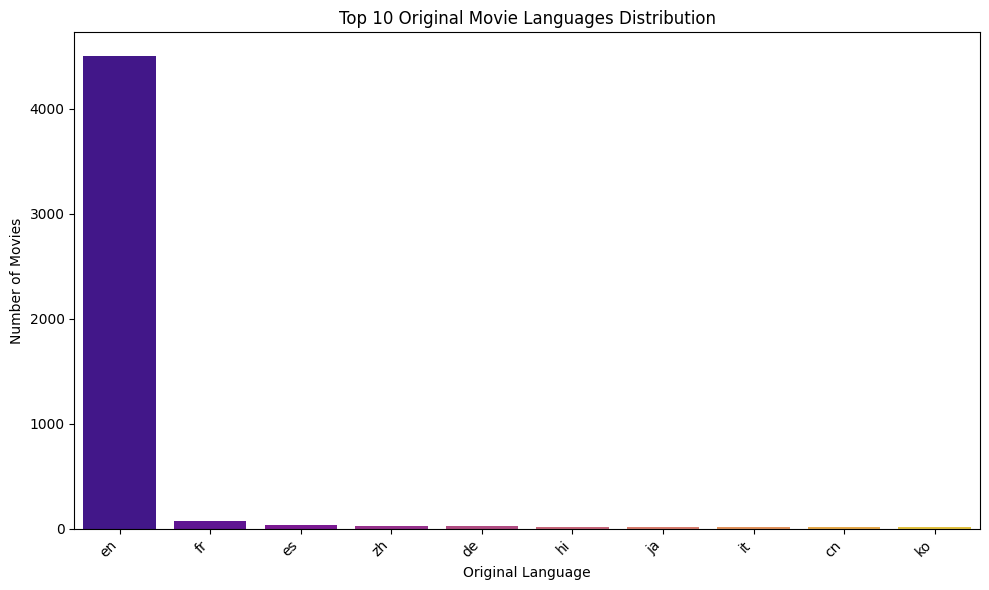

In [ ]:
# Hitung frekuensi bahasa asli film dan dapatkan 10 teratas
language_counts = df2['original_language'].value_counts().head(10)

# Memvisualisasikan distribusi bahasa menggunakan diagram batang
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette='plasma')
plt.title('Top 10 Original Movie Languages Distribution')
plt.xlabel('Original Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Insigth

1. **Bahasa Inggris Dominan**
   Bahasa Inggris ("en") sangat mendominasi dengan lebih dari 4.500 film, jauh di atas bahasa lain.

2. **Bahasa Lain Tertinggal Jauh**
   Bahasa seperti Prancis, Spanyol, Mandarin, Hindi, dan lainnya masing-masing hanya menyumbang sebagian kecil (kurang dari 150 film).

3. **Distribusi Tidak Merata**
   Industri film global sangat terpusat pada produksi berbahasa Inggris.

4. **Peluang untuk Bahasa Lokal**
   Kehadiran bahasa Asia seperti Hindi, Mandarin, dan Korea menunjukkan potensi pertumbuhan jika didukung distribusi yang baik.


#### Visualisasi distribusi status rilis film menggunakan bar chart

<ipython-input-13-7fd830967c71>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')


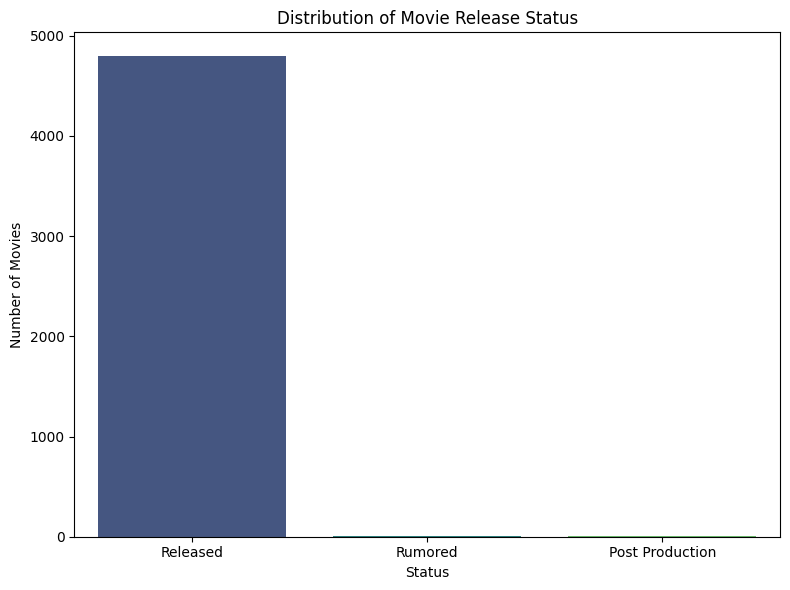

In [ ]:
# Hitung jumlah setiap status rilis
status_counts = df2['status'].value_counts()

# Visualisasi distribusi status rilis film menggunakan bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')
plt.title('Distribution of Movie Release Status')
plt.xlabel('Status')
plt.ylabel('Number of Movies')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Insigth
Berikut insight ringkas dari grafik distribusi status rilis film:

1. **Mayoritas Film Sudah Dirilis**
   Sebagian besar film (hampir 5.000) berstatus "Released".

2. **Jumlah Film yang Belum Dirilis Sangat Sedikit**
   Film dengan status "Rumored" dan "Post Production" jumlahnya sangat kecil dibandingkan yang sudah dirilis.

3. **Fokus Data pada Film yang Telah Tayang**
   Dataset ini sangat terpusat pada film yang telah dirilis, sehingga cocok untuk analisis performa atau tren film yang sudah tersedia di pasar.


#### Visualisasi distribusi tahun rilis film

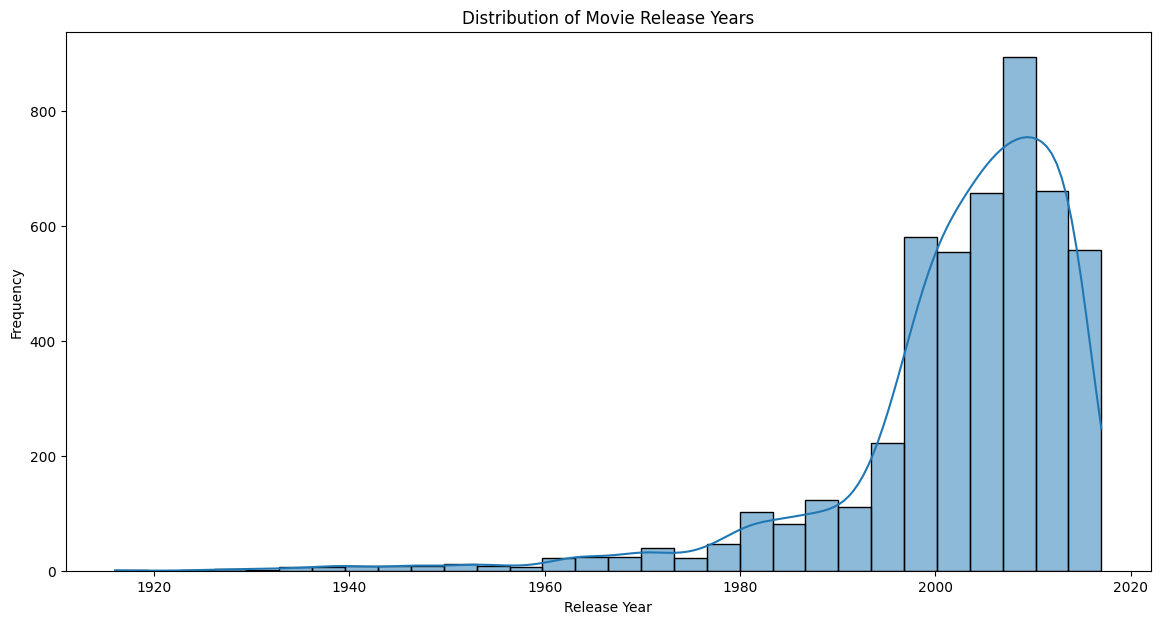


Statistik Deskriptif untuk Tahun Rilis:
count    4802.000000
mean     2002.468763
std        12.414354
min      1916.000000
25%      1999.000000
50%      2005.000000
75%      2011.000000
max      2017.000000
Name: release_year, dtype: float64


In [ ]:
# Mengubah kolom 'release_date' menjadi tipe datetime
df2['release_date'] = pd.to_datetime(df2['release_date'], errors='coerce')

# Mengekstrak tahun dari tanggal rilis
df2['release_year'] = df2['release_date'].dt.year

# Menghitung jumlah film per tahun
release_year_counts = df2['release_year'].value_counts().sort_index()

# Visualisasi distribusi tahun rilis menggunakan histogram
plt.figure(figsize=(14, 7))
sns.histplot(df2['release_year'].dropna(), bins=30, kde=True)
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

# Menampilkan statistik deskriptif untuk tahun rilis
print("\nStatistik Deskriptif untuk Tahun Rilis:")
print(df2['release_year'].describe())


#### Insight

Berikut insight ringkas dari grafik dan statistik distribusi tahun rilis film:

1. **Mayoritas Film Dirilis Setelah Tahun 2000**
   Dengan nilai median tahun rilis adalah **2005**, serta 75% film dirilis setelah **1999**, terlihat bahwa mayoritas film dalam dataset merupakan produksi **modern**.

2. **Peningkatan Produksi Sejak 1970-an**
   Terjadi lonjakan produksi film sejak era 1970-an, yang terus meningkat hingga mencapai puncaknya pada **2005–2015**.

3. **Dominasi Film Era 2000-an**
   Nilai **rata-rata (mean)** tahun rilis adalah **2002**, yang menunjukkan dominasi film dari dua dekade terakhir dalam dataset ini.

4. **Distribusi Kurang Merata Sebelum 1980**
   Nilai **minimum** adalah tahun **1916**, namun hanya sebagian kecil film yang dirilis sebelum **1980**, mencerminkan perkembangan industri film yang masih terbatas pada periode tersebut.

5. **Penurunan Setelah Tahun 2015**
   Penurunan tajam pada jumlah film rilis setelah **2015** dapat disebabkan oleh keterbatasan data terbaru atau gangguan industri seperti pandemi.



#### Visualisasi Popularitas 10 Film Teratas

<ipython-input-16-08de3f5a58f3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='popularity', data=top_popular_movies, palette='viridis')


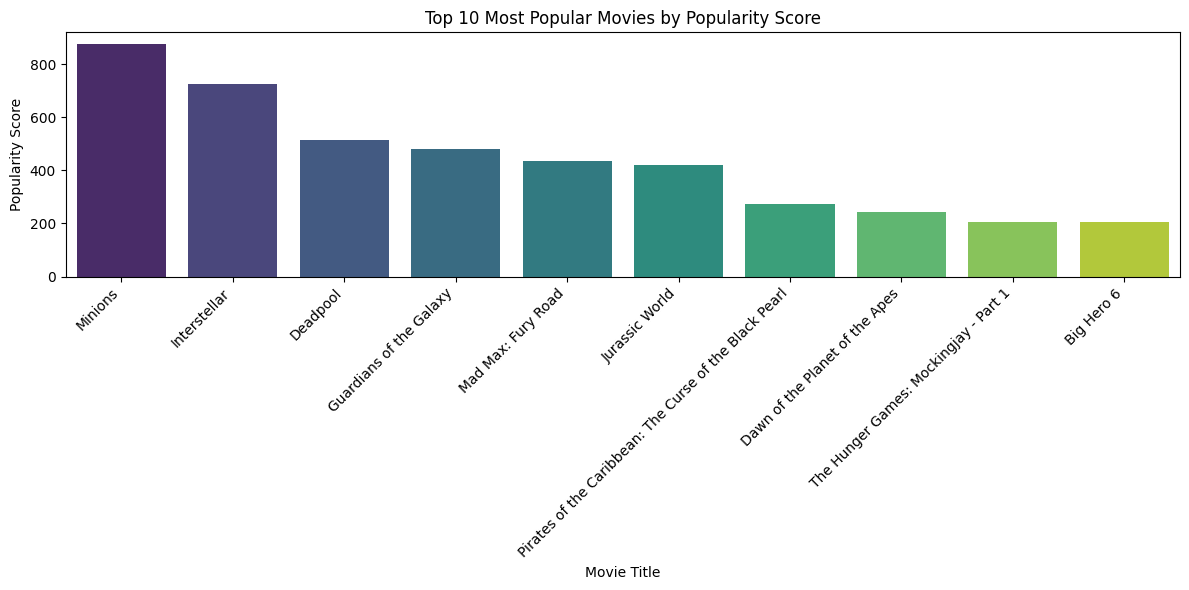

In [ ]:
# Urutkan DataFrame berdasarkan kolom 'popularity' secara menurun dan ambil 10 baris teratas
top_popular_movies = df2.sort_values(by='popularity', ascending=False).head(10)


# Visualisasi Popularitas 10 Film Teratas
plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='popularity', data=top_popular_movies, palette='viridis')
plt.title('Top 10 Most Popular Movies by Popularity Score')
plt.xlabel('Movie Title')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Insight

1. **Minions Merajai Popularitas**
   Film *Minions* menempati posisi teratas dengan skor popularitas tertinggi, melampaui film-film lain secara signifikan.

2. **Dominasi Film Blockbuster**
   Film-film populer seperti *Interstellar*, *Deadpool*, *Guardians of the Galaxy*, dan *Jurassic World* termasuk dalam daftar, menunjukkan bahwa **film dengan skala produksi besar dan cakupan global cenderung memiliki skor popularitas tinggi**.

3. **Franchise dan Film Aksi/Fantasi Mendominasi**
   Sebagian besar film dalam daftar ini merupakan bagian dari franchise besar atau bergenre aksi/sci-fi/fantasi, yang biasanya memiliki basis penggemar luas dan dukungan promosi besar-besaran.

4. **Distribusi Popularitas Turun Signifikan**
   Setelah posisi ke-2, skor popularitas mengalami penurunan bertahap namun signifikan, dengan perbedaan hampir 700 poin antara film pertama (*Minions*) dan ke-10 (*Big Hero 6*), menunjukkan **skala kesenjangan popularitas yang besar di antara film-film top**.



#### Visualisasi Popularitas 10 Film Terendah

<ipython-input-17-f6d9d6782845>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='popularity', data=bottom_popular_movies, palette='viridis')


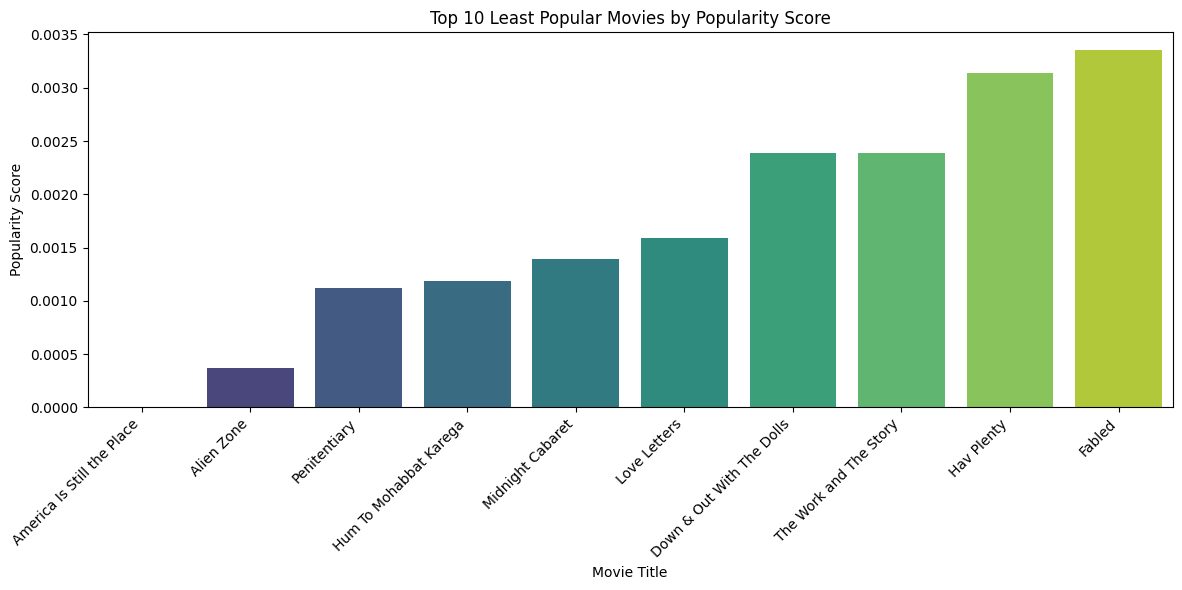

In [ ]:
# Select the bottom 10 least popular movies
# Urutkan DataFrame berdasarkan kolom 'popularity' secara menaik dan ambil 10 baris teratas
bottom_popular_movies = df2.sort_values(by='popularity', ascending=True).head(10)

# Visualisasi Popularitas 10 Film Terendah
plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='popularity', data=bottom_popular_movies, palette='viridis')
plt.title('Top 10 Least Popular Movies by Popularity Score')
plt.xlabel('Movie Title')
plt.ylabel('Popularity Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Insight

1. **Film Kurang Dikenal Mendominasi Daftar**
   Judul-judul seperti *America Is Still the Place*, *Alien Zone*, dan *Penitentiary* kemungkinan besar kurang dikenal atau memiliki distribusi terbatas, yang berkontribusi pada skor popularitas yang sangat rendah.

2. **Skor Popularitas Sangat Rendah dan Merata**
   Nilai popularitas pada daftar ini sangat kecil, dengan kisaran di bawah 0.0035. Ini menandakan **minimnya eksposur publik terhadap film-film ini**, baik dari sisi penayangan, promosi, maupun pencarian daring.

3. **Potensi Film Independen atau Niche**
   Judul-judul ini berpotensi merupakan film indie, dokumenter lokal, atau rilisan terbatas yang tidak menyasar pasar massal, sehingga secara alami memperoleh skor popularitas yang lebih rendah.

4. **Perbedaan Jarak Sangat Tajam dengan Film Paling Populer**
   Dibandingkan dengan film terpopuler seperti *Minions* (dengan skor >800), **film-film ini memiliki skor yang nyaris mendekati nol**, menunjukkan **kontras ekstrem dalam jangkauan audiens dan penerimaan publik**.

In [ ]:
# Menampilkan nama kolom df1
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [ ]:
# Menampilkan  nama kolom df2
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'genres_list', 'release_year'],
      dtype='object')

## **3. Data Preprocessing**

### **3.1 Pembersihan dan Penggabungan Dataset**

Pada bagian ini, kita akan membersihkan dataset dan menggabungkan dua DataFrame (`df1` dan `df2`) menjadi satu DataFrame utama (`df`).

#### **Langkah-langkah**
- **Langkah 1**: Menghapus baris dengan nilai null pada kolom `tagline` dan `overview` di `df2` untuk memastikan data yang digunakan lengkap.
- **Langkah 2**: Memeriksa kolom yang sama antara `df1` dan `df2` untuk menghindari duplikasi data.
- **Langkah 3**: Menghapus kolom `title` dari `df2` karena kolom ini sudah ada di `df1` dengan nilai yang identik.
- **Langkah 4**: Menggabungkan `df1` dan `df2` menggunakan fungsi `pd.merge()` berdasarkan kolom `movie_id` di `df1` dan `id` di `df2`.
- **Langkah 5**: Menghapus kolom `id` pada dataset hasil penggabungan,, karena sudah ada `movie_id` dengan nilai yang sama.

#### **Hasil Akhir**
Dataset gabungan (`df`) akan berisi informasi lengkap dari kedua DataFrame, yang siap digunakan untuk analisis lebih lanjut.

In [ ]:
# Menghapus baris dengan nilai null pada kolom 'tagline' dan 'overview'
df2.dropna(subset=['tagline', 'overview'], inplace=True)

In [ ]:
# Cek nama kolom yang sama antara df1 dan df2
common_columns = set(df1.columns).intersection(set(df2.columns))

if common_columns:
    print(f"Kolom yang sama antara df1 dan df2: {common_columns}")
else:
    print("Tidak ada kolom yang sama antara df1 dan df2.")

Kolom yang sama antara df1 dan df2: {'title'}


In [ ]:
df1["title"].head(10)

,title
0,Avatar
1,Pirates of the Caribbean: At World's End
2,Spectre
3,The Dark Knight Rises
4,John Carter
5,Spider-Man 3
6,Tangled
7,Avengers: Age of Ultron
8,Harry Potter and the Half-Blood Prince
9,Batman v Superman: Dawn of Justice


In [ ]:
df2["title"].head(10)

,title
0,Avatar
1,Pirates of the Caribbean: At World's End
2,Spectre
3,The Dark Knight Rises
4,John Carter
5,Spider-Man 3
6,Tangled
7,Avengers: Age of Ultron
8,Harry Potter and the Half-Blood Prince
9,Batman v Superman: Dawn of Justice


In [ ]:
# Hapus kolom 'title' dari df2 karena sudah ada di df1 dengan nilai yang sama
del df2['title']

In [ ]:
# Menggabungkan df1 dan df2 menjadi df
df = pd.merge(df1, df2, left_on='movie_id', right_on='id')

In [ ]:
# tampilkan informasi dataset hasil penggabungan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3959 entries, 0 to 3958
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   movie_id              3959 non-null   int64         
 1   title                 3959 non-null   object        
 2   cast                  3959 non-null   object        
 3   crew                  3959 non-null   object        
 4   budget                3959 non-null   int64         
 5   genres                3959 non-null   object        
 6   homepage              1493 non-null   object        
 7   id                    3959 non-null   int64         
 8   keywords              3959 non-null   object        
 9   original_language     3959 non-null   object        
 10  original_title        3959 non-null   object        
 11  overview              3959 non-null   object        
 12  popularity            3959 non-null   float64       
 13  production_compani

In [ ]:
# Hapus kolom 'id' karena sudah ada movie_id dengan nilai yang sama pada dataset gabungan
del df['id']

In [ ]:
# Menampilkan 5 data teratas
df.head()

,movie_id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,genres_list,release_year
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]",2009.0
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,"[Adventure, Fantasy, Action]",2007.0
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,"[Action, Adventure, Crime]",2015.0
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,"[Action, Crime, Drama, Thriller]",2012.0
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,"[Action, Adventure, Science Fiction]",2012.0


### **3.2 Data Preparation**

#### Ekstraksi dan Pembersihan Data Film

> Pada tahap ini dilakukan proses persiapan data untuk memastikan hanya fitur-fitur yang relevan dan dalam format yang sesuai digunakan dalam analisis lebih lanjut.

* **Salinan Data**: Dataset utama disalin ke dalam variabel `df_pre` untuk menghindari modifikasi langsung terhadap data asli.

* **Ekstraksi Kata Kunci (Keywords)**: Kolom `keywords`, yang awalnya berbentuk string JSON, diubah menjadi list nama-nama kata kunci. Hal ini dilakukan untuk mempermudah proses ekstraksi fitur berbasis teks.

* **Penanganan Missing Values**: Kolom teks `tagline` dan `overview` diisi dengan string kosong (`''`) jika terdapat nilai yang hilang (NaN). Ini bertujuan agar tidak terjadi error saat pemrosesan teks dengan TF-IDF.

* **Ekstraksi Pemeran (Cast)**: Data pada kolom `cast`, yang juga berupa string JSON, diubah menjadi list nama-nama pemeran untuk setiap film.

* **Seleksi Kolom**: Kolom-kolom yang dianggap relevan untuk analisis lanjutan yang disimpan, yaitu `title`, `genres_list`, `keywords_list`, `overview`, `tagline`, `cast_list`, dan `popularity`.

* **Normalisasi Data Popularity**: Karena popularity memiliki nilai numerik yang besar, maka dilakukan normalisasi agar fitur ini tidak mendominasi perhitungan jarak atau kemiripan dibanding fitur lain seperti genre, keyword, dan lainnya yang telah dinormalisasi dalam bentuk vektor (seperti TF-IDF atau one-hot encoding).


#### Keuntungan Normalisasi `popularity`

1. **Menyamakan Skala Fitur**
   Membuat `popularity` setara dengan fitur lain seperti TF-IDF, agar tidak mendominasi hasil perhitungan kemiripan.

2. **Menghindari Bias Rekomendasi**
   Tanpa normalisasi, film populer bisa terlalu sering direkomendasikan, meskipun kurang relevan secara konten.

3. **Meningkatkan Akurasi Model**
   Model dapat menangkap hubungan antar fitur secara lebih adil, meningkatkan kualitas hasil rekomendasi.

4. **Stabil dalam Perhitungan Jarak**
   Algoritma seperti cosine similarity, KNN, atau clustering jadi lebih stabil karena semua fitur berada pada skala yang seragam.

5. **Konsistensi dengan Fitur Teks**
   Fitur teks (overview, keyword, dsb.) sudah ternormalisasi lewat TF-IDF. Normalisasi `popularity` menjaga konsistensi antar semua fitur.

#### Tujuan

* Mengubah struktur data menjadi lebih mudah diproses oleh model.
* Menangani nilai kosong agar tidak mengganggu proses transformasi fitur.
* Menyederhanakan data agar fokus pada informasi penting terkait konten dan metadata film.
* Mengurangi bias dan meningkatkan Akurasi Model



In [ ]:
df_pre = df.copy()

# ekstrak keywords sebagai list
df_pre['keywords_list'] = df_pre['keywords'].apply(json.loads).apply(lambda x: [d['name'] for d in x])
df_pre['tagline'] = df_pre['tagline'].fillna('')
df_pre['overview'] = df_pre['overview'].fillna('')

# Ekstrak nama-nama pemeran dari kolom 'cast'
df_pre['cast_list'] = df_pre['cast'].apply(json.loads).apply(lambda x: [d['name'] for d in x])

df_pre = df_pre[['title','genres_list','keywords_list','overview','tagline','cast_list','popularity']]
df_pre.head()

,title,genres_list,keywords_list,overview,tagline,cast_list,popularity
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",150.437577
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","At the end of the world, the adventure begins.","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",139.082615
2,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,A Plan No One Escapes,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",107.376788
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,The Legend Ends,"[Christian Bale, Michael Caine, Gary Oldman, A...",112.312950
4,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","Lost in our world, found in another.","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",43.926995


In [ ]:
# Normalisasi data popularity
# mengabil data popularity
popularity_data = df_pre[['popularity']].values

# Inisialisasi scaler
scaler = MinMaxScaler()

# Fit dan transform data popularity
popularity_scaled = scaler.fit_transform(popularity_data)

### **3.3 Feature Engineering**

#### Ekstraksi dan Transformasi Fitur Teks dan Numerik

> Pada tahap ini, dilakukan ekstraksi dan transformasi beberapa fitur penting dari dataset film untuk membentuk representasi numerik yang bisa digunakan dalam pemodelan machine learning. Fitur-fitur yang digunakan mencakup genre, ringkasan film (*overview*), kata kunci (*keywords*), pemeran (*cast*), tagline, dan tingkat popularitas.

* **Genre**: Kolom `genres_list`, yang berisi daftar genre untuk setiap film, dikonversi menjadi format biner. Setiap genre direpresentasikan sebagai kolom, dan setiap film diberi tanda 1 jika memiliki genre tersebut, atau 0 jika tidak.

* **Overview**: Kolom `overview`, yang berisi ringkasan film dalam bentuk teks, diubah menjadi vektor menggunakan teknik TF-IDF (Term Frequency-Inverse Document Frequency). Hanya 5000 kata yang paling informatif yang dipilih untuk mewakili isi dari kolom ini.

* **Keywords**: Kata kunci dari setiap film digabungkan menjadi satu string per baris, kemudian diproses menggunakan TF-IDF dengan batas maksimum 3000 fitur. Tujuannya adalah untuk menangkap konteks atau topik unik dari setiap film.

* **Cast**: Nama-nama pemeran utama dalam `cast_list` digabung menjadi string dan diubah menjadi representasi TF-IDF dengan 2000 fitur teratas. Ini membantu mengidentifikasi aktor-aktor yang sering muncul atau berpengaruh dalam film.

* **Tagline**: Kalimat singkat promosi film (tagline) juga ditransformasikan menjadi vektor TF-IDF, dibatasi hingga 2000 fitur terpenting.

* **Popularitas**: Menggunakan nilai Popularitas yang sudah di normalisasikan, agar fitur ini tidak mendominasi perhitungan jarak atau kemiripan dibanding fitur lain seperti genre, keyword, dan lainnya yang telah dinormalisasi dalam bentuk vektor (seperti TF-IDF atau one-hot encoding).

> Setelah semua fitur diekstraksi dan ditransformasi, seluruh vektor tersebut digabungkan secara horizontal untuk membentuk satu matriks fitur utama. Matriks inilah yang nantinya akan digunakan dalam proses pelatihan model atau analisis clustering.

#### Tujuan

* Mengubah data teks menjadi representasi numerik yang bisa diproses oleh algoritma machine learning.
* Menggabungkan berbagai sumber informasi (konten film, metadata, hingga statistik popularitas) untuk membentuk fitur yang lebih kaya dan informatif.



In [ ]:
# Membuat objek MultiLabelBinarizer untuk mengubah daftar genre menjadi matriks biner
mlb = MultiLabelBinarizer()

# Mengubah daftar genre di kolom 'genres_list' menjadi matriks biner
# Setiap baris mewakili film, setiap kolom mewakili genre tertentu (1 jika genre ada, 0 jika tidak)
genre_mat = mlb.fit_transform(df_pre['genres_list'])

# Membuat objek TfidfVectorizer untuk teks overview dengan stop words bahasa Inggris dihapus
# dan membatasi jumlah fitur (kata) maksimal sebanyak 5000
tfidf_over = TfidfVectorizer(stop_words='english', max_features=5000)

# Mengubah teks di kolom 'overview' menjadi matriks TF-IDF yang merepresentasikan bobot kata
over_mat = tfidf_over.fit_transform(df_pre['overview'])

# Membuat objek TfidfVectorizer untuk keywords dengan stop words bahasa Inggris dihapus
# dan membatasi jumlah fitur maksimal sebanyak 3000
tfidf_key = TfidfVectorizer(stop_words='english', max_features=3000)

# Mengubah daftar keywords di kolom 'keywords_list' menjadi string dengan spasi sebagai pemisah
# Kemudian mengubahnya menjadi matriks TF-IDF
key_mat = tfidf_key.fit_transform(df_pre['keywords_list'].apply(lambda x: ' '.join(x)))

# Membuat objek TfidfVectorizer untuk daftar pemeran (cast) dengan batas fitur maksimal 2000
tfidf_cast = TfidfVectorizer(stop_words='english', max_features=2000)

# Mengubah daftar pemeran di kolom 'cast_list' menjadi string, lalu menjadi matriks TF-IDF
cast_mat = tfidf_cast.fit_transform(df_pre['cast_list'].apply(lambda x: ' '.join(x)))

# Membuat objek TfidfVectorizer untuk tagline dengan batas fitur maksimal 2000
tfidf_tagline = TfidfVectorizer(stop_words='english', max_features=2000)

# Mengubah teks di kolom 'tagline' menjadi matriks TF-IDF
tagline_mat = tfidf_tagline.fit_transform(df_pre['tagline'])

In [ ]:
# Menggabungkan semua matriks fitur secara horizontal (genre, overview, keywords, tagline, cast) dan menambahkan kolom 'popularity' sebagai fitur numerik
feature_mat = hstack([genre_mat, over_mat, key_mat, tagline_mat, cast_mat,  popularity_scaled])

## **4. Modeling and Results**

### **4.1 Content‑based Filtering**

Pada tahap ini, kita akan membangun sistem rekomendasi berbasis konten menggunakan pendekatan berikut:

#### **Langkah-langkah Implementasi**

##### **1. Menentukan Nama Film Referensi (Input)**  

- **Penjelasan**: Variabel `nama_film` menyimpan judul film yang akan digunakan sebagai acuan untuk rekomendasi, dalam hal ini adalah "Superman". Nama ini akan digunakan untuk mencari film serupa berdasarkan fitur tertentu (misalnya, genre atau fitur lain yang sudah diolah sebelumnya dalam `feature_mat`).


##### **2. Membuat Mapping dari Judul Film ke Indeks**  

- **Penjelasan**:
  - Kode ini membuat **pemetaan** (mapping) antara judul film (kolom `'title'` dalam DataFrame `df_pre`) dengan indeks barisnya di DataFrame.
  - `pd.Series` digunakan untuk membuat Series dengan indeks berupa judul film dan nilai berupa indeks baris dari DataFrame `df_pre`.
  - `drop_duplicates()` memastikan tidak ada duplikasi judul film dalam mapping, sehingga setiap judul film memiliki indeks unik.
  - **Tujuan**: Memudahkan pencarian indeks film berdasarkan judulnya untuk proses rekomendasi.


##### **3. Menghitung Cosine Similarity Antar Film**  

- **Penjelasan**:
  - Fungsi `cosine_similarity` dari library seperti `scikit-learn` digunakan untuk menghitung **kemiripan kosinus** (cosine similarity) antara semua pasangan film dalam matriks fitur `feature_mat`.
  - `feature_mat` diasumsikan sebagai matriks yang berisi representasi numerik dari fitur film (misalnya, vektor genre, deskripsi, atau fitur lain yang sudah diproses sebelumnya).
  - Hasilnya adalah matriks `cos_sim` berukuran NxN (dengan N adalah jumlah film), di mana setiap elemen `(i, j)` menunjukkan skor kemiripan antara film ke-i dan film ke-j.
  - Skor kemiripan berkisar antara 0 (tidak mirip) hingga 1 (sangat mirip).


##### **4. Fungsi get_recommendations**  

- **Penjelasan**:
  - **Fungsi**: Fungsi ini menghasilkan rekomendasi film berdasarkan judul film yang diberikan (`title`) dan jumlah rekomendasi yang diinginkan (`top_n`, default 10).
  - **Langkah-langkah**:
    1. **Cek keberadaan film**: Memeriksa apakah judul film ada dalam `indices`. Jika tidak, mengembalikan pesan bahwa film tidak ditemukan.
    2. **Ambil indeks film**: Menggunakan `indices[title]` untuk mendapatkan indeks film dari judul yang diberikan.
    3. **Ambil skor kemiripan**: Mengambil semua skor kemiripan dari film input (`cos_sim[idx]`) dan menggabungkannya dengan indeks film menggunakan `enumerate` untuk melacak film mana yang memiliki skor tersebut.
    4. **Urutkan berdasarkan kemiripan**: Mengurutkan daftar skor kemiripan dari tertinggi ke terendah (`reverse=True`) dan mengambil `top_n` film teratas (mengabaikan film itu sendiri dengan `[1:top_n+1]`).
    5. **Ekstrak indeks dan skor**: Memisahkan indeks film yang direkomendasikan (`rec_idx`) dan skor kemiripannya (`similarity_scores`).
    6. **Buat DataFrame rekomendasi**: Mengambil judul dan genre dari DataFrame `df_pre` untuk indeks yang direkomendasikan, menambahkan kolom `similarity_score`, dan membulatkannya ke 3 desimal.
  - **Output**: Mengembalikan DataFrame berisi judul film, genre, dan skor kemiripan untuk film yang direkomendasikan.

##### **5. Mendapatkan rekomendasi dengan similarity score**  

- **Penjelasan**:
  - Memanggil fungsi `get_recommendations` dengan input `nama_film` ("Superman") dan `top_n=10` untuk mendapatkan 10 film yang paling mirip dengan "Superman".
  - Hasilnya disimpan dalam variabel `recommendations` sebagai DataFrame yang berisi judul, genre, dan skor kemiripan.


##### **6. Menampilkan hasil dengan format yang lebih rapi**  

- **Penjelasan**:
  - **Cek keberadaan film**: Memeriksa apakah `nama_film` ada dalam `indices`. Jika tidak, menampilkan pesan bahwa film tidak ditemukan.
  - **Tampilkan genre film input**: Mengambil genre film input dari `df_pre['genres_list']` menggunakan indeks film dan menampilkannya.
  - **Format tabel rekomendasi**:
    1. Membuat salinan DataFrame `recommendations` untuk ditampilkan.
    2. Mengubah kolom `genres_list` (yang mungkin berupa list) menjadi string dengan genre dipisahkan koma menggunakan `', '.join(x)`.
    3. Mencetak header tabel dengan lebar kolom yang sudah ditentukan (No.id, Judul Film, Genre, Similarity Score).
    4. Mengiterasi setiap baris di `recommendations_table` untuk menampilkan nomor urut, judul film (maksimal 47 karakter), genre (maksimal 42 karakter), dan skor kemiripan dengan format yang rapi.
    5. Menggunakan formatting string (`:<`) untuk menjaga penyelarasan teks ke kiri dan memastikan tabel terlihat rapi dengan panjang kolom tetap.
  - **Output**: Menampilkan tabel rekomendasi dengan format yang mudah dibaca, menunjukkan 10 film yang mirip dengan "Superman" beserta genre dan skor kemiripannya.

---
> Hasil dari tahap ini adalah daftar rekomendasi film yang relevan berdasarkan konten film yang dipilih.

In [ ]:
# 1. Menentukan Nama Film Referensi (Input)
nama_film = 'Superman'

# 2. Membuat Mapping dari Judul Film ke Indeks
indices = pd.Series(df_pre.index, index=df_pre['title']).drop_duplicates()

# 3. Menghitung Cosine Similarity Antar Film
cos_sim = cosine_similarity(feature_mat, feature_mat)

# 4. Fungsi get_recommendations
def get_recommendations(title, top_n=10):
    if title not in indices:
        return f"Film '{title}' tidak ditemukan dalam dataset."

    idx = indices[title]
    sims = list(enumerate(cos_sim[idx]))
    sims = sorted(sims, key=lambda x: x[1], reverse=True)[1:top_n+1]
    rec_idx = [i for i, _ in sims]
    similarity_scores = [score for _, score in sims]

    recommendations = df_pre[['title', 'genres_list']].iloc[rec_idx].copy()
    recommendations['similarity_score'] = similarity_scores
    recommendations['similarity_score'] = recommendations['similarity_score'].round(3)

    return recommendations

# 5. Mendapatkan rekomendasi dengan similarity score
recommendations = get_recommendations(nama_film, 10)

# 6. Menampilkan hasil dengan format yang lebih rapi
if nama_film in indices:
    title_idx = indices[nama_film]
    G_input = df_pre.loc[title_idx, 'genres_list']

    print(f"Genre untuk film '{nama_film}': {G_input}")
    print(f"\nRekomendasi untuk film '{nama_film}':")

    # Format tabel rekomendasi
    recommendations_table = recommendations.copy()
    recommendations_table['genres_list'] = recommendations_table['genres_list'].apply(lambda x: ', '.join(x))
    print("\nTabel Rekomendasi Film:")
    print("="*122)
    print(f"|{'No.id':<7}|{'Judul Film':<50}|{'Genre':<45}|{'Similarity Score':<15}|")
    print("="*122)

    for idx, row in recommendations_table.iterrows():
        print(f"|{idx+1:<7}|{row['title'][:47]:<50}|{row['genres_list'][:42]:<45}|{row['similarity_score']:<15.3f}|")
    print("="*122)
else:
    print(f"Film '{nama_film}' tidak ditemukan dalam dataset.")


Genre untuk film 'Superman': ['Action', 'Adventure', 'Fantasy', 'Science Fiction']

Rekomendasi untuk film 'Superman':

Tabel Rekomendasi Film:
|No.id  |Judul Film                                        |Genre                                        |Similarity Score|
|14     |Man of Steel                                      |Action, Adventure, Fantasy, Science Fictio   |0.690          |
|841    |Superman II                                       |Action, Adventure, Fantasy, Science Fictio   |0.648          |
|1238   |Superman III                                      |Comedy, Action, Adventure, Fantasy, Scienc   |0.569          |
|227    |The Wolverine                                     |Action, Science Fiction, Adventure, Fantas   |0.541          |
|46     |X-Men: Days of Future Past                        |Action, Adventure, Fantasy, Science Fictio   |0.538          |
|2251   |Superman IV: The Quest for Peace                  |Action, Adventure, Science Fiction           |0.514      

#### **Insight**
1. **Film Teratas**:
   - *Man of Steel* memiliki skor kemiripan tertinggi (0.688), diikuti oleh *Superman II* (0.636).
   - Film-film ini memiliki genre yang sangat mirip dengan film referensi.

2. **Rentang Skor**:
   - Tertinggi: 0.69 (*Man of Steel*).
   - Terendah: 0.503 (*The Shadow*).

3. **Konsistensi Genre**:
   - Mayoritas film memiliki genre *Action*, *Adventure*, dan *Fantasy*.
   - Beberapa film menambahkan variasi genre seperti *Comedy* atau *Thriller*.

4. **Relevansi Tematik**:
   - Film-film teratas memiliki hubungan langsung dengan tema superhero atau fiksi ilmiah.
   - Rekomendasi mencakup film dari franchise yang sama (*Superman*) maupun film dengan tema serupa (*X-Men*, *Avatar*).

### **4.2 Visualisasi Distribusi Skor Similarity**

Pada bagian ini, akan memvisualisasikan distribusi skor kesamaan antara film yang dipilih dengan 10 film yang direkomendasikan. Langkah-langkah yang dilakukan meliputi:

1. **Membuat DataFrame untuk Visualisasi**
   - Membuat DataFrame baru dengan kolom Title dan Similarity Score dari hasil rekomendasi.

2. **Menghitung Rata-rata Similarity**
   - Menghitung rata-rata skor kemiripan dari semua film yang direkomendasikan.

3. **Membuat Plot Batang**
   - Menggunakan seaborn barplot untuk memvisualisasikan skor kemiripan.
   - Menambahkan garis rata-rata dengan warna merah dan gaya garis putus-putus.

4. **Menyesuaikan Tampilan Plot**
   - Menambahkan judul yang mencantumkan nama film referensi.
   - Memberikan label sumbu X dan Y yang informatif.
   - Memutar label sumbu X 45° agar mudah dibaca.
   - Menambahkan nilai skor di atas setiap batang.

5. **Menambahkan Legenda**
   - Menampilkan legenda untuk menunjukkan garis rata-rata.

6. **Finalisasi Tampilan**
   - Menyesuaikan tata letak dengan tight_layout().
   - Menampilkan plot final.

> Hasil dari tahap ini adalah visualisasi diagram batang yang memberikan wawasan tentang tingkat kesamaan antara film yang dipilih dengan film-film yang direkomendasikan dan rata-rata similarity score.

<ipython-input-34-d15c76b182c4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title', y='Similarity Score', data=similarity_df, palette='viridis')


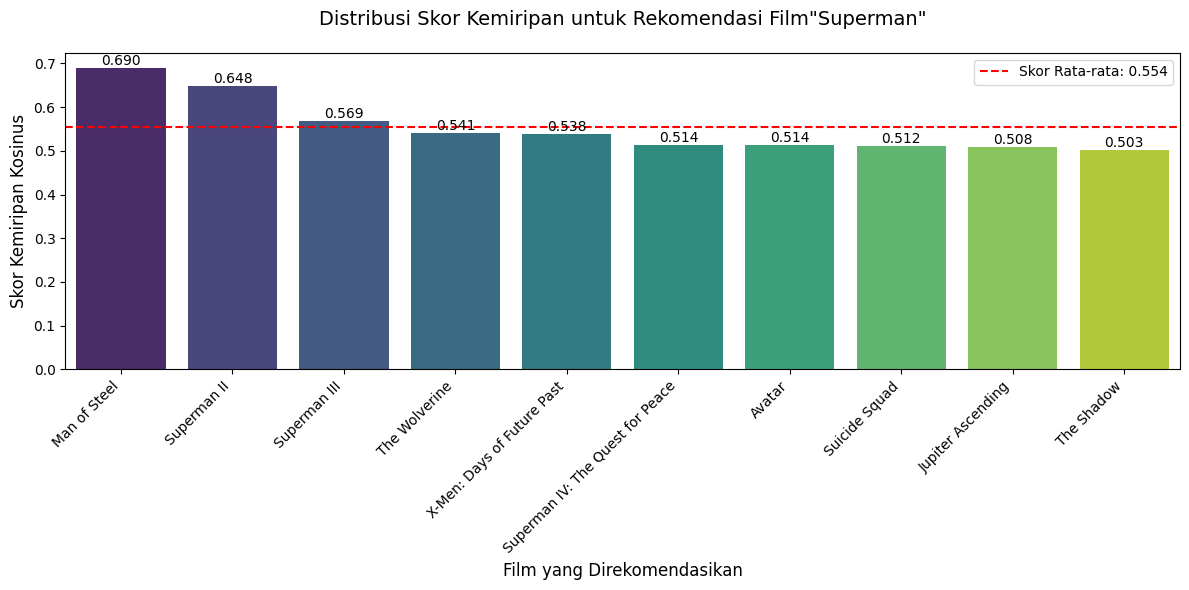

In [ ]:
# Membuat DataFrame untuk visualisasi
similarity_df = pd.DataFrame({
    'Title': recommendations['title'],
    'Similarity Score': recommendations['similarity_score']
})

# Menghitung rata-rata skor kemiripan
mean_similarity = similarity_df['Similarity Score'].mean()

# Membuat plot batang
plt.figure(figsize=(12, 6))
sns.barplot(x='Title', y='Similarity Score', data=similarity_df, palette='viridis')

# Menambahkan garis rata-rata
plt.axhline(y=mean_similarity, color='r', linestyle='--', label=f'Skor Rata-rata: {mean_similarity:.3f}')

# Menyesuaikan tampilan plot
plt.title(f'Distribusi Skor Kemiripan untuk Rekomendasi Film"{nama_film}"', fontsize=14, pad=20)
plt.xlabel('Film yang Direkomendasikan', fontsize=12)
plt.ylabel('Skor Kemiripan Kosinus', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Menambahkan label nilai di atas batang
for i, score in enumerate(similarity_df['Similarity Score']):
    plt.text(i, score, f'{score:.3f}', ha='center', va='bottom')

# Menambahkan legenda
plt.legend()

# Menyesuaikan tata letak dan menampilkan
plt.tight_layout()
plt.show()

#### **Insight**

Berikut adalah poin-poin utama dari visualisasi distribusi skor kemiripan untuk rekomendasi film mirip "Superman":

* **Skor Kemiripan Tertinggi:**

  * *Man of Steel* — **0.690**
  * *Superman II* — **0.648**
  * *Superman III* — **0.569**

* **Skor Rata-rata Kemiripan:**

  * Ditandai dengan garis merah putus-putus di grafik
  * Nilainya adalah **0.554**

* **Film dengan Skor di Bawah Rata-rata tetapi Masih Relevan:**

  * *The Wolverine* — 0.541
  * *X-Men: Days of Future Past* — 0.538
  * *Avatar* — 0.514
  * *Suicide Squad* — 0.512
  * *Jupiter Ascending* — 0.508
  * *The Shadow* — 0.503

* **Kesimpulan:**

  * Sebagian besar film memiliki skor kemiripan yang cukup dekat dengan nilai rata-rata.
  * Rekomendasi teratas sangat relevan karena berasal dari seri film *Superman* sendiri.
  * Film lain yang direkomendasikan juga memiliki kemiripan tematik atau genre dengan *Superman*, meskipun skornya sedikit di bawah rata-rata.


## **5. Evaluation - Content Based Filtering**

Berikut adalah rumus untuk menghitung Precision@k, Recall@k, dan F1-Score@k berdasarkan perbandingan genre antara film input dan film-film rekomendasi.

---

### Rumus Precision@k
$$\text{Precision@k} = \frac{1}{k} \sum_{i=1}^{k} \frac{|G_{\text{input}} \cap G_i|}{|G_i|}$$

- **Penjelasan**:  
  Precision@k menghitung rata-rata proporsi genre dalam setiap film rekomendasi yang juga terdapat pada genre film input.

  - $G_{\text{input}}$: Himpunan genre film input.  
  - $G_i$: Himpunan genre film rekomendasi ke-i.  
  - $|G_{\text{input}} \cap G_i|$: Jumlah genre yang sama antara film input dan film rekomendasi ke-i.  
  - $|G_i|$: Jumlah total genre dalam film rekomendasi ke-i.  
Rata-rata dihitung dari $k$ film rekomendasi.

---

### Rumus Recall@k
$$\text{Recall@k} = \frac{1}{k} \sum_{i=1}^{k} \frac{|G_{\text{input}} \cap G_i|}{|G_{\text{input}}|}$$

- **Penjelasan**:  
  Recall@k menghitung rata-rata proporsi genre film input yang ditemukan dalam genre setiap film rekomendasi.  

  - $|G_{\text{input}}|$: Jumlah total genre dalam film input.  
  - Rata-rata dihitung dari $k$ film rekomendasi.

---

### Rumus F1-Score@k
$$\text{F1-Score@k} = 2 \times \frac{\text{Precision@k} \times \text{Recall@k}}{\text{Precision@k} + \text{Recall@k}}$$

- **Penjelasan**:  
  F1-Score@k adalah rata-rata harmonik dari Precision@k dan Recall@k, memberikan ukuran keseimbangan antara keduanya.  
  - **Catatan**: Jika $\text{Precision@k} + \text{Recall@k} = 0$, maka $\text{F1-Score@k} = 0$ untuk menghindari pembagian dengan nol.

---

### Ringkasan
- **Precision@k**: Mengukur ketepatan genre rekomendasi dibandingkan genre yang direkomendasikan.  
- **Recall@k**: Mengukur kelengkapan genre input yang tercakup dalam rekomendasi.  
- **F1-Score@k**: Menggabungkan Precision@k dan Recall@k untuk evaluasi yang seimbang.  


In [ ]:
def compute_metrics_at_k(G_input, recommended_genres_list):
    """
    Menghitung Precision@k, Recall@k, dan F1-Score@k berdasarkan perbandingan genre
    antara film input dan film-film rekomendasi.

    Parameters:
    G_input (list): Daftar genre dari film input.
    recommended_genres_list (list of lists): Daftar yang berisi genre dari setiap film rekomendasi.

    Returns:
    tuple: (precision_at_k, recall_at_k, f1_score_at_k)
    """
    k = len(recommended_genres_list)
    if k == 0:
        return 0, 0, 0

    G_input_set = set(G_input)
    precision_sum = 0
    recall_sum = 0

    for G_i in recommended_genres_list:
        G_i_set = set(G_i)
        intersection = G_input_set.intersection(G_i_set)

        # Precision: proporsi genre rekomendasi yang ada di genre input
        if len(G_i_set) > 0:
            precision_i = len(intersection) / len(G_i_set)
        else:
            precision_i = 0

        # Recall: proporsi genre input yang ada di genre rekomendasi
        if len(G_input_set) > 0:
            recall_i = len(intersection) / len(G_input_set)
        else:
            recall_i = 0

        precision_sum += precision_i
        recall_sum += recall_i

    precision_at_k = precision_sum / k
    recall_at_k = recall_sum / k

    # F1-Score sebagai rata-rata harmonik
    if precision_at_k + recall_at_k > 0:
        f1_score_at_k = 2 * (precision_at_k * recall_at_k) / (precision_at_k + recall_at_k)
    else:
        f1_score_at_k = 0

    return precision_at_k, recall_at_k, f1_score_at_k

In [ ]:
# Mendapatkan rekomendasi genres_list
recommended_genres_list = recommendations['genres_list'].tolist()

# Menghitung metrik
precision, recall, f1 = compute_metrics_at_k(G_input, recommended_genres_list)

# Menampilkan hasil
print(f"Precision@k: {precision}")
print(f"Recall@k: {recall}")
print(f"F1-Score@k: {f1}")

Precision@k: 0.9400000000000001
Recall@k: 0.975
F1-Score@k: 0.9571801566579634


## **6. Kesimpulan**
Sistem rekomendasi berbasis konten ini telah menunjukkan hasil yang memuaskan dalam memberikan rekomendasi film yang relevan. Dengan pengembangan lebih lanjut, sistem ini dapat menjadi alat yang lebih efektif untuk membantu pengguna menemukan film yang sesuai dengan preferensi mereka dan memiliki potensi untuk meningkatkan *engagement* pada platform streaming.

1. **Sistem Rekomendasi Berbasis Konten**:
   - Sistem rekomendasi berhasil memberikan rekomendasi film yang relevan berdasarkan fitur seperti genre, kata kunci, pemeran, tagline, dan popularitas.
   - Film dengan skor kemiripan tertinggi memiliki genre dan tema yang sangat mirip dengan film referensi.

2. **Evaluasi Sistem**:
   - **Precision@k**: 0.94  (Sistem memiliki tingkat ketepatan yang baik dalam merekomendasikan film dengan genre yang sesuai.)
   - **Recall@k**: 0.975 hasil pembulatan adalah 1.0 (Sistem mampu mencakup sebagian besar genre dari film referensi dalam rekomendasi.)
   - **F1-Score@k**: 0.957 hasil pembulatan adalah 0.96 (Menunjukkan keseimbangan antara ketepatan dan kelengkapan rekomendasi.)

3. **Visualisasi Distribusi Skor Kemiripan**:
   - Film dengan skor kemiripan tertinggi berasal dari franchise yang sama atau memiliki tema serupa.
   - Rata-rata skor kemiripan menunjukkan bahwa sebagian besar rekomendasi cukup relevan.

